# **Assignment 1 - Part A**


## Assignment 1 - Regression Models
Part A: Experiment on univariate linear regression. You are allowed to pick only 2 features from the dataset and will train an univariate linear regression for each of them.

We will be working on a dataset consolidated from census data in the USA. The goal is to accurately predict cancer mortality based on information related to US counties.The dataset contains 33 different features (demography, medical information). 

The metric used to assess model performance is MSE (mean squared error)

You will loading the dataset from this link: 
https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

The steps are:

1.   Load and Explore Dataset
2.   Data Preparation
3.   Assess Baseline Model
4.   Train Initial Model with the first Feature
5.   Train Second Model with the second Feature 

### 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt

**[1.2]** Mounting the drive

In this notebook, I'm mounting the Google drive to read a csv file that is stored on my drive. You must allow access to your drive by signing in to your Google account.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download the cancer_us_county-training.csv and cancer_us_county-testing.csv datasets from here: https://drive.google.com/drive/folders/1_50s_IxJsABTRFTWBR0XjuSOnDL4YFuQ

Then, copy it to your Google drive folder which contains the notebook

In [3]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive". The below command lists the contents in the drive:
!ls "/content/drive/My Drive"

 AT2_default_template.gdoc
 CNN_Articles_2021-2023.csv
 CNN_Articles_2021-2023.gsheet
'Colab Notebooks'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (1).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (2).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c (3).gsheet'
'Copy of Data meaning https:  tinyurl.com DSI-Dmean-c.gsheet'
'Copy of MLAA - Lecture 1.gslides'
'Copy of MLAA - Lecture 2.gslides'
'Copy of MLAA - Lecture 5.gslides'
 data
'DSP_AT3 _REPORT.gdoc'
'DSP - Lab 4 - Exercise 1 - Solutions.gdoc'
 DVN_data
'Experiment reports'
 Lambda_Project_Report_Draft.gdoc
 NLP_data
'ODI Data Ethics Canvas.gdoc'
 Untitled
'Untitled document (1).gdoc'
'Untitled document.gdoc'


**[1.3]** Create a variable called file_url containing the link to the CSV file for training data

In [4]:
file_url = pd.read_csv('/content/drive/My Drive/data/cancer_us_county-training.csv')

**[1.4]** Load the training dataset into dataframe called df

In [5]:
df = pd.DataFrame(file_url)

**[1.5]** Display the first 5 rows of df

In [6]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


**[1.6]** Display the last 5 rows of df

In [7]:
df.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043
2436,1962.667684,23,171.1,453.549422,39764,8856,16.7,0.000000,"(37413.8, 40362.7]",43.8,...,37.3,40.0,21.3,94.625317,0.154508,0.629070,0.684251,49.880605,6.210826,3045
2437,219.000000,89,179.7,449.100000,40801,37585,17.2,0.000000,"(40362.7, 42724.4]",42.9,...,37.5,39.4,21.8,91.393432,3.381528,0.055305,3.149772,49.892641,6.549178,3046


**[1.7]** Display the dimensions (shape) of df

In [8]:
df.shape

(2438, 35)

**[1.8]** Display the list of columns of df

In [9]:
df.columns


Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

**[1.9]** Display the descriptive statistics of df


In [10]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


**[1.10]** Display the summary (info) of df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

From the result from the summary above for the training dataset,there are 3 columns with missing values that need further exploration and cleaning: PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone

**[1.11]** Create a variable called file_url_test containing the link to the CSV file for testing data

In [12]:
file_url_test = pd.read_csv('/content/drive/My Drive/data/cancer_us_county-testing.csv')

**[1.12]** Load the testing dataset into dataframe called df_test

In [13]:
df_test = pd.DataFrame(file_url_test)

**[1.13]** Display the first 5 rows of df_test

In [14]:
df_test.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.0,18,131.6,410.8,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,...,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394


**[1.14]** Display the last 5 rows of df_test

In [15]:
df_test.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,"(48021.6, 51046.4]",39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822
608,42.000000,17,199.1,491.800000,26408,7507,38.5,0.000000,"[22640, 34218.1]",34.8,...,28.0,52.2,33.4,13.933562,85.947799,0.118640,0.000000,25.540275,4.610131,92


**[1.15]** Display the dimensions (shape) of df_test


In [16]:
df_test.shape

(609, 35)

**[1.16]** Display the list of columns of df_test

In [17]:
df_test.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

**[1.17]** Display the descriptive statistics of df_test

In [18]:
df_test.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02,609.000000,609.000000,609.000000,609.000000,...,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,683.067944,207.476190,177.925780,448.109810,47202.812808,1.191372e+05,16.973563,112.885432,45.106404,39.289984,...,41.011658,36.160263,19.261084,83.121969,9.365754,1.346103,2.125887,51.352773,5.691785,1519.840722
std,1978.627131,708.568892,28.599788,59.573942,12520.769346,4.899460e+05,6.495675,358.996110,46.334158,5.254323,...,9.771919,7.920750,6.193365,16.793593,15.215528,2.809767,3.419138,6.856244,2.063121,899.544555
min,9.000000,3.000000,59.700000,269.900000,24035.000000,1.358000e+03,4.700000,0.000000,23.200000,23.700000,...,16.300000,14.800000,6.200000,13.933562,0.000000,0.000000,0.000000,23.885628,0.284091,10.000000
25%,75.000000,28.000000,160.200000,420.500000,39025.000000,1.218100e+04,12.400000,0.000000,37.400000,36.100000,...,33.600000,30.600000,14.300000,77.048638,0.607010,0.278340,0.318345,47.399630,4.585307,704.000000
50%,169.000000,61.000000,178.200000,453.549422,45292.000000,2.558600e+04,15.500000,0.000000,40.800000,39.300000,...,40.700000,36.300000,18.900000,89.606996,2.004479,0.547264,0.943696,51.708723,5.475268,1597.000000
75%,513.000000,138.000000,194.100000,476.700000,52476.000000,6.783700e+04,20.400000,58.267135,43.900000,42.700000,...,47.800000,41.800000,23.100000,95.363876,11.063967,1.245240,2.356943,55.590179,6.593969,2298.000000
max,38150.000000,14010.000000,362.800000,1206.900000,106871.000000,1.017029e+07,41.900000,4260.367794,579.600000,58.600000,...,70.200000,57.500000,38.800000,99.498433,85.947799,33.760905,25.504910,71.703057,21.326165,3044.000000


**[1.18]** Display the summary (info) of df_test

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              609 non-null    float64
 1   avgDeathsPerYear         609 non-null    int64  
 2   TARGET_deathRate         609 non-null    float64
 3   incidenceRate            609 non-null    float64
 4   medIncome                609 non-null    int64  
 5   popEst2015               609 non-null    int64  
 6   povertyPercent           609 non-null    float64
 7   studyPerCap              609 non-null    float64
 8   binnedInc                609 non-null    object 
 9   MedianAge                609 non-null    float64
 10  MedianAgeMale            609 non-null    float64
 11  MedianAgeFemale          609 non-null    float64
 12  Geography                609 non-null    object 
 13  AvgHouseholdSize         609 non-null    float64
 14  PercentMarried           6

From the result from the summary above for the testing dataset,there are 3 columns with missing values that need further exploration and cleaning: PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone

### 2. Data Preparation

**[2.1]** Let's create a copy of our training dataframe

In [20]:
df_cleaned = df.copy()

**[2.2]** Let's create a copy of our testing dataframe

In [21]:
df_test_cleaned = df_test.copy()

**[2.3]** Display the observations with missing values in PctSomeCol18_24

In [22]:
#From training dataset
df_cleaned[df_cleaned['PctSomeCol18_24'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
6,1962.667684,36,153.9,453.549422,65373,23298,10.0,0.000000,"(61494.5, 125635]",34.7,...,52.1,23.8,10.7,94.086188,1.290608,0.901657,0.685083,62.609863,8.095893,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,124.000000,56,208.3,469.100000,44762,20315,13.0,0.000000,"(42724.4, 45201]",41.7,...,46.4,33.9,17.3,94.631461,0.993813,0.477420,2.309154,55.469044,6.736597,3040
2433,389.000000,157,185.3,456.600000,65485,83199,7.7,0.000000,"(61494.5, 125635]",40.1,...,55.1,24.2,11.3,91.187608,4.445537,1.405213,0.858126,60.095060,5.175689,3041
2434,286.000000,117,196.7,492.400000,42477,46222,16.9,281.251352,"(40362.7, 42724.4]",40.8,...,46.2,34.9,18.8,90.130702,5.943936,0.472935,0.485833,51.648588,4.651829,3042
2435,103.000000,42,204.1,506.700000,40339,18201,21.3,0.000000,"(37413.8, 40362.7]",38.6,...,34.4,36.9,20.6,65.463178,30.550955,0.645909,0.104891,49.758980,4.344104,3043


In [23]:
# From testing dataset
df_test_cleaned[df_test_cleaned['PctSomeCol18_24'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394
5,9.0,3,130.6,349.8,43132,1683,15.4,0.000000,"(42724.4, 45201]",51.2,...,41.3,30.7,7.4,94.675926,0.000000,0.347222,0.000000,64.993216,8.620690,885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,286.0,122,161.1,393.0,41736,64362,20.2,15.537118,"(40362.7, 42724.4]",35.6,...,19.5,47.2,27.5,75.956092,3.708013,1.345724,8.291742,48.647964,8.221797,102
604,27.0,14,187.6,415.7,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.0,9,131.6,444.6,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.0,258,187.5,429.4,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746


**[2.4]** Dropping "PctSomeCol18_24" column from both training and testing sets

In [24]:
# From training dataset
df_cleaned = df_cleaned.drop("PctSomeCol18_24", axis='columns')

In [25]:
# From testing dataset
df_test_cleaned = df_test_cleaned.drop("PctSomeCol18_24", axis='columns')

**[2.5]** Display the observations with missing values in PctEmployed16_Over

In [26]:
# From training dataset
df_cleaned[df_cleaned['PctEmployed16_Over'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
17,1780.000000,748,169.1,418.700000,44976,362895,18.4,286.584274,"(42724.4, 45201]",39.3,...,41.9,37.0,19.8,88.368622,1.084692,2.511063,2.227357,44.094095,4.213583,20
73,407.000000,126,174.0,536.200000,54924,78702,12.3,216.004676,"(54545.6, 61494.5]",39.3,...,57.3,29.0,13.8,96.528112,0.479464,0.523642,0.465171,56.068914,4.763673,91
88,1962.667684,6,141.4,453.549422,46318,2564,12.8,0.000000,"(45201, 48021.6]",41.7,...,43.7,34.5,13.3,95.465300,0.867508,0.670347,0.512618,56.003752,3.783784,111
98,33.000000,11,138.7,380.500000,82597,11065,4.6,0.000000,"(61494.5, 125635]",32.3,...,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,78.075397,6.102877,123
107,55.000000,25,198.5,457.800000,45413,9259,14.4,0.000000,"(45201, 48021.6]",39.6,...,44.1,37.3,18.2,96.012931,0.140086,0.452586,2.661638,51.068376,7.290533,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,13.000000,6,197.5,444.000000,47376,1760,10.8,0.000000,"(45201, 48021.6]",50.3,...,42.0,33.5,11.7,98.179750,0.000000,0.170648,0.910125,48.152425,7.560137,2817
2338,1962.667684,571,154.4,453.549422,76269,414686,7.3,159.156567,"(61494.5, 125635]",37.5,...,63.7,22.7,10.6,84.131951,5.216719,4.565241,2.659528,54.817021,5.401030,2928
2358,168.000000,75,233.1,516.900000,45615,45408,17.9,0.000000,"(45201, 48021.6]",33.0,...,43.3,32.6,20.0,72.212889,21.552569,2.267955,1.094311,44.730148,5.677722,2953
2368,549.000000,210,185.2,493.900000,39905,95946,17.7,10.422529,"(37413.8, 40362.7]",42.2,...,35.2,36.9,21.2,94.518090,0.660137,1.189955,1.861841,52.991802,6.406014,2964


In [27]:
# From testing dataset
df_test_cleaned[df_test_cleaned['PctEmployed16_Over'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
3,94.000000,46,189.4,403.800000,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
7,38.000000,17,153.9,388.800000,48125,6524,11.7,0.000000,"(48021.6, 51046.4]",43.8,...,36.4,34.9,18.3,95.783866,0.426180,0.000000,1.065449,50.969213,7.280000,1818
20,25.000000,10,165.6,473.100000,45000,3634,12.0,0.000000,"(42724.4, 45201]",46.1,...,42.1,33.6,14.6,95.953757,0.192678,0.715662,0.000000,62.553191,9.191759,1580
34,50.000000,21,181.9,463.500000,42555,7344,14.4,0.000000,"(40362.7, 42724.4]",43.9,...,37.0,38.7,19.5,97.927879,0.605490,0.242196,0.080732,60.394022,7.260963,313
35,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,"(48021.6, 51046.4]",28.8,...,55.3,19.6,8.7,84.292884,3.999409,4.407352,0.607131,41.844085,4.146877,2623
43,1962.667684,11,176.2,453.549422,53903,4330,11.7,0.000000,"(51046.4, 54545.6]",39.8,...,49.8,27.2,11.2,88.318503,0.844171,1.049509,8.167922,61.097993,12.219731,1628
54,181.000000,81,183.9,427.400000,43998,31914,13.7,0.000000,"(42724.4, 45201]",43.6,...,46.2,34.5,18.0,76.835262,18.393057,0.749658,0.824313,50.967845,5.278871,1583
65,627.000000,242,165.1,430.400000,58833,149633,10.2,13.366036,"(54545.6, 61494.5]",37.3,...,57.9,24.7,12.6,92.809915,2.165539,2.013114,1.237942,58.175333,4.614684,2911
114,677.000000,297,195.5,443.600000,42232,138900,19.5,158.387329,"(40362.7, 42724.4]",38.2,...,41.6,38.6,23.5,54.895540,41.744379,1.161715,0.305791,45.289023,5.663639,2311
139,110.000000,52,214.9,471.500000,33623,17662,26.3,0.000000,"[22640, 34218.1]",42.9,...,27.4,49.2,27.9,96.536307,0.277322,0.113193,1.080989,46.042553,3.919463,1260


**[2.6]** Replace all "PctEmployed16_Over" missing values with its mean

In [28]:
# From training dataset
PctEmployed16_Over_mean = df_cleaned['PctEmployed16_Over'].mean()
df_cleaned['PctEmployed16_Over'] = df_cleaned['PctEmployed16_Over'].fillna(PctEmployed16_Over_mean)

In [29]:
# From testing dataset
PctEmployed16_Over_test_mean = df_test_cleaned['PctEmployed16_Over'].mean()
df_test_cleaned['PctEmployed16_Over'] = df_test_cleaned['PctEmployed16_Over'].fillna(PctEmployed16_Over_test_mean)

**[2.7]** Display the observations with missing values in PctPrivateCoverageAlone

In [30]:
# From training dataset
df_cleaned[df_cleaned['PctPrivateCoverageAlone'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
9,404.0,134,150.9,480.7,44148,63100,16.5,15.847861,"(42724.4, 45201]",42.9,...,45.0,40.7,22.5,96.027111,0.997907,0.465378,0.501296,48.488328,4.741223,9
12,10.0,5,151.4,300.1,35924,2206,22.1,0.000000,"(34218.1, 37413.8]",43.1,...,33.5,38.0,17.3,88.338448,6.093819,0.043840,3.156510,51.708428,6.788512,13
16,511.0,163,156.2,473.8,59946,144251,15.9,1310.216220,"(54545.6, 61494.5]",29.8,...,60.6,20.9,10.4,84.146849,5.447661,5.971915,1.948564,42.806625,4.117880,18
23,26.0,10,106.5,357.4,39572,4312,11.6,0.000000,"(37413.8, 40362.7]",46.9,...,36.6,28.7,9.0,96.632537,0.523322,0.000000,0.068259,50.991080,9.305374,27
32,1003.0,395,191.5,501.1,44800,181635,15.6,16.516641,"(42724.4, 45201]",39.8,...,32.1,36.3,19.6,82.068741,10.767423,2.033612,0.616471,47.332234,5.729334,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,43.0,19,229.5,548.3,30828,6358,27.1,0.000000,"[22640, 34218.1]",41.6,...,33.6,48.9,31.5,96.515844,0.409901,0.252247,1.844553,52.616399,4.848046,3003
2410,117.0,42,143.7,416.2,38445,21139,19.9,94.611855,"(37413.8, 40362.7]",44.0,...,35.6,40.4,21.9,95.762591,1.945118,0.475579,0.565939,55.254438,4.341957,3014
2412,96.0,38,174.0,460.0,41759,16491,18.1,0.000000,"(40362.7, 42724.4]",40.7,...,38.6,46.0,24.8,75.913591,20.564056,0.108011,1.320132,51.505484,5.340224,3016
2418,249.0,88,224.4,651.3,32749,32477,25.8,0.000000,"[22640, 34218.1]",39.5,...,32.3,43.3,26.3,18.148990,77.072503,1.319927,1.273231,27.009295,4.372409,3024


In [31]:
# From testing dataset
df_test_cleaned[df_test_cleaned['PctPrivateCoverageAlone'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
10,257.000000,114,248.2,550.300000,30127,37756,31.1,0.000000,"[22640, 34218.1]",40.5,...,29.8,53.0,34.6,97.948200,0.804678,0.274263,0.049160,48.281230,4.732510,434
11,120.000000,49,155.8,385.400000,40680,32623,20.6,0.000000,"(40362.7, 42724.4]",33.8,...,38.4,33.4,21.0,74.567628,9.805548,0.814057,12.346020,56.887487,6.467920,692
24,86.000000,36,166.0,423.200000,52260,16829,11.7,0.000000,"(51046.4, 54545.6]",41.4,...,48.8,31.0,14.9,96.810217,0.386100,0.207900,1.585982,56.409871,5.702648,1150
27,346.000000,156,176.8,399.000000,44207,62194,14.6,0.000000,"(42724.4, 45201]",546.0,...,42.6,36.2,18.6,74.844730,21.417651,0.342389,1.576584,51.591360,4.194566,486
31,131.000000,46,179.7,511.700000,32711,22574,32.6,0.000000,"[22640, 34218.1]",37.6,...,30.8,42.1,26.3,49.251588,47.471935,0.274128,1.109564,41.191646,7.192481,2453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1962.667684,9,150.7,453.549422,58543,6133,8.3,0.000000,"(54545.6, 61494.5]",36.1,...,48.4,22.1,11.4,98.351195,0.000000,0.131904,1.071723,64.883721,6.199262,1733
586,17.000000,7,116.0,307.300000,27882,3584,28.5,0.000000,"[22640, 34218.1]",49.0,...,20.6,57.5,31.2,92.962860,0.000000,0.781904,2.094387,44.818119,7.517483,1627
589,175.000000,78,180.1,405.300000,34288,35370,28.8,28.272547,"(34218.1, 37413.8]",37.9,...,31.9,42.8,25.3,65.823139,29.619573,1.077737,2.180668,45.651392,7.919234,1398
592,99.000000,41,183.7,457.400000,35470,18023,24.7,0.000000,"(34218.1, 37413.8]",39.9,...,35.5,43.5,26.4,46.158483,49.342394,0.000000,2.498904,42.751142,4.488542,1737


**[2.8]**  Dropping "PctPrivateCoverageAlone" column from both training and testing sets

In [32]:
#From training dataset
df_cleaned = df_cleaned.drop("PctPrivateCoverageAlone", axis='columns')

In [33]:
#From testing dataset
df_test_cleaned = df_test_cleaned.drop("PctPrivateCoverageAlone", axis='columns')

**[2.9]** Check there is no missing value for all columns

In [34]:
# From training dataset
df_cleaned.isna().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
Id                        0
dtype: int64

In [35]:
# From testing datsset
df_test_cleaned.isna().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
Id                        0
dtype: int64

**2.10** Find row that has Median Age larger than 100

In [36]:
# From training dataset
med_age_over_100 = df_cleaned['MedianAge'] > 100
df_cleaned[med_age_over_100]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
52,281.000000,112,168.0,433.200000,57126,51659,11.4,0.000000,"(54545.6, 61494.5]",498.0,...,52.6,31.3,15.5,95.083688,1.131744,0.345440,1.633681,53.986783,5.772258,62
566,49.000000,23,267.6,552.900000,37061,7131,19.4,0.000000,"(34218.1, 37413.8]",501.6,...,34.8,42.4,25.4,96.918728,1.469965,0.000000,0.098940,53.151558,4.939064,720
610,240.000000,95,193.5,501.400000,49897,37519,16.5,0.000000,"(48021.6, 51046.4]",502.8,...,49.9,36.2,17.0,92.216248,5.071432,0.218778,0.548263,50.062526,6.037875,776
679,35.000000,12,188.8,538.800000,36449,4251,17.3,0.000000,"(34218.1, 37413.8]",619.2,...,20.2,53.8,27.1,98.442662,0.070788,0.165172,0.141576,46.769034,3.333333,861
800,959.000000,398,206.7,497.400000,41010,201410,18.8,24.824984,"(40362.7, 42724.4]",424.8,...,32.6,35.9,20.2,69.410704,23.273279,3.041250,1.080156,41.830737,5.131499,1022
841,1962.667684,4,148.6,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,...,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499,1071
855,25.000000,10,229.8,555.700000,34936,5685,27.2,0.000000,"(34218.1, 37413.8]",349.2,...,18.4,39.6,32.9,21.724323,0.035849,0.000000,0.035849,36.829268,6.625097,1087
982,827.000000,327,178.7,469.100000,41296,158276,17.9,164.270009,"(40362.7, 42724.4]",470.4,...,41.3,35.1,20.7,70.779606,18.325626,1.475608,6.150408,46.795028,4.493937,1233
991,186.000000,93,193.4,406.200000,37122,25345,19.0,0.000000,"(34218.1, 37413.8]",624.0,...,29.4,53.2,23.4,96.145821,0.625960,0.519665,0.141727,48.108966,4.012841,1245
1009,140.000000,59,193.1,478.000000,66522,25512,6.9,0.000000,"(61494.5, 125635]",498.0,...,55.4,24.4,9.3,96.813880,0.954259,0.563880,0.339117,61.336613,7.938903,1267


In [37]:
# From testing dataset
med_age_over_100_test= df_test_cleaned['MedianAge'] > 100
df_test_cleaned[med_age_over_100]

<ipython-input-37-56137150afb5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cleaned[med_age_over_100]


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
52,950.0,315,173.2,550.1,41757,130779,19.3,267.627066,"(40362.7, 42724.4]",41.7,...,45.0,41.0,22.4,93.046153,2.517226,0.677744,1.522850,45.577634,6.073152,965
566,100.0,43,206.9,525.6,48921,10606,14.4,94.286253,"(48021.6, 51046.4]",52.7,...,39.9,39.2,12.3,79.434543,19.296445,0.000000,0.279929,53.800092,2.714681,982


**2.11** Replace row that has Median Age larger than 100 with the mean value of the Median Age column

In [38]:
# From training dataset
df_cleaned['MedianAge'].where(~med_age_over_100, other = df_cleaned['MedianAge'].mean(), inplace = True)

In [39]:
# From testing dataset
df_test_cleaned['MedianAge'].where(~med_age_over_100_test, other = df_test_cleaned['MedianAge'].mean(), inplace = True)

**[2.10]** Find row that has MedianAgeMale larger than 100

In [40]:
# From training dataset
med_age_male_over_100 = df_cleaned['MedianAgeMale'] > 100
df_cleaned[med_age_male_over_100]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id


In [41]:
# From testing dataset
med_age_over_100_test= df_test_cleaned['MedianAgeMale'] > 100
df_test_cleaned[med_age_over_100]

<ipython-input-41-ef64565546e1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cleaned[med_age_over_100]


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
52,950.0,315,173.2,550.1,41757,130779,19.3,267.627066,"(40362.7, 42724.4]",41.7,...,45.0,41.0,22.4,93.046153,2.517226,0.677744,1.522850,45.577634,6.073152,965
566,100.0,43,206.9,525.6,48921,10606,14.4,94.286253,"(48021.6, 51046.4]",52.7,...,39.9,39.2,12.3,79.434543,19.296445,0.000000,0.279929,53.800092,2.714681,982


**[2.11]** Find row that has MedianAgeFemale larger than 100


In [42]:
# From training dataset
med_age_Female_over_100 = df_cleaned['MedianAgeFemale'] > 100
df_cleaned[med_age_Female_over_100]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id


In [43]:
# From testing dataset
med_age_Female_over_100_test= df_test_cleaned['MedianAgeFemale'] > 100
df_test_cleaned[med_age_Female_over_100]

<ipython-input-43-5af26fb92782>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_cleaned[med_age_Female_over_100]


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id


**[2.12]** Display scatter plots for the target variable against other features

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


<Axes: xlabel='BirthRate', ylabel='TARGET_deathRate'>

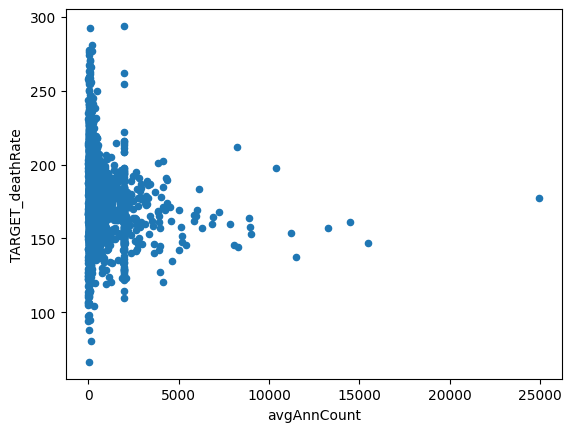

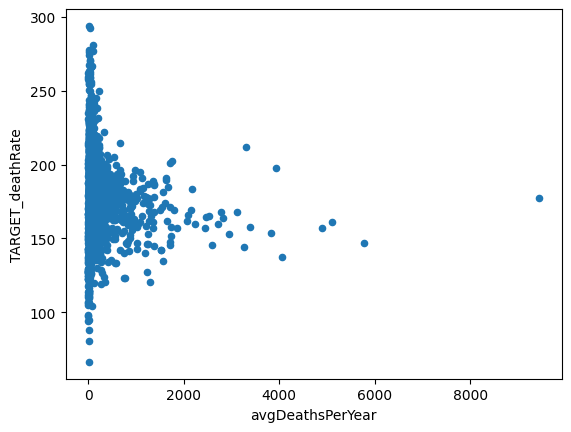

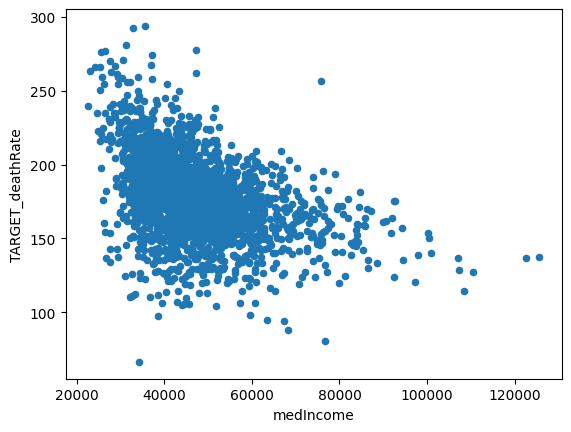

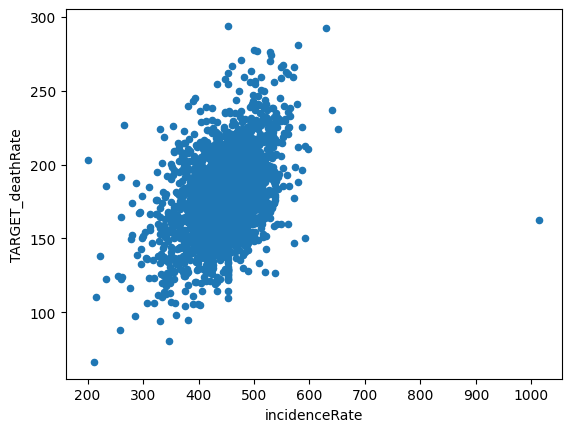

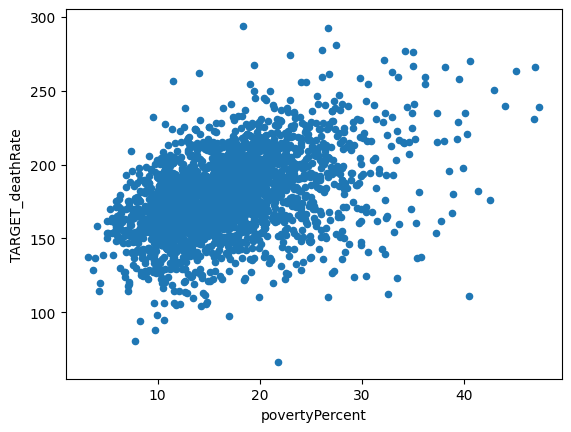

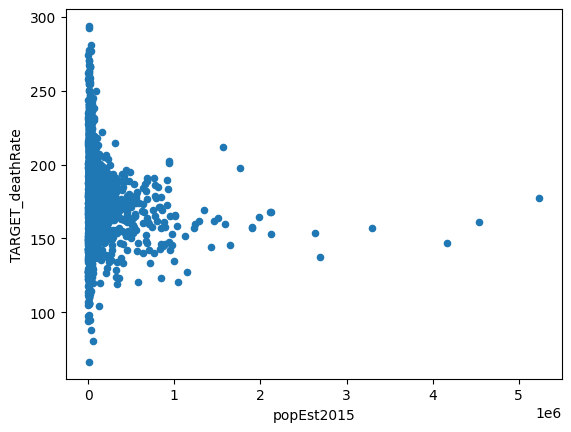

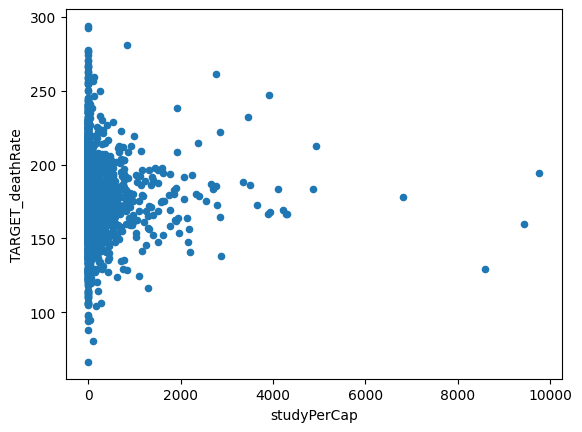

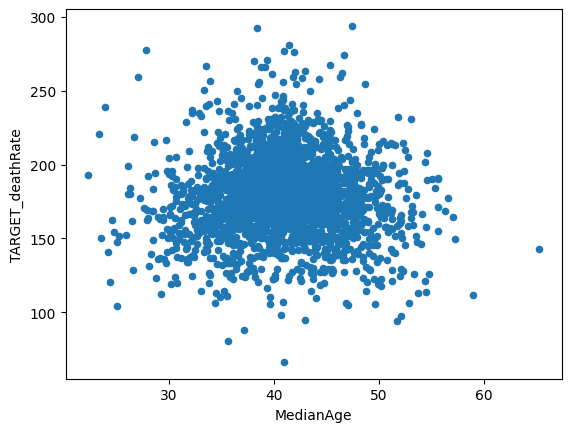

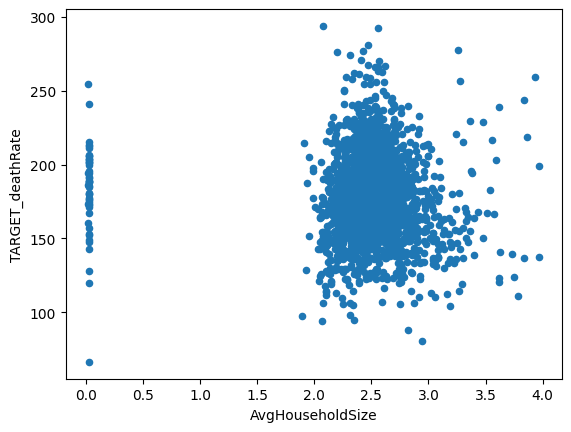

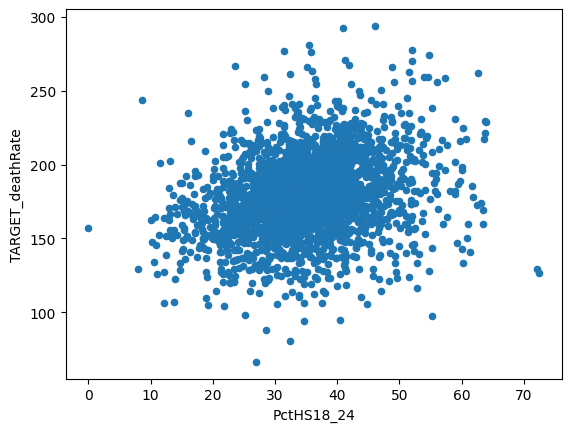

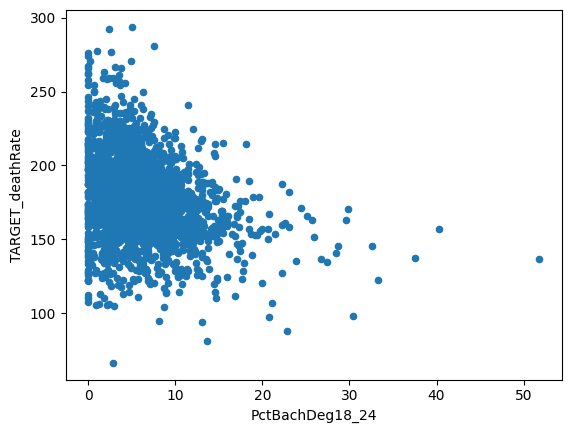

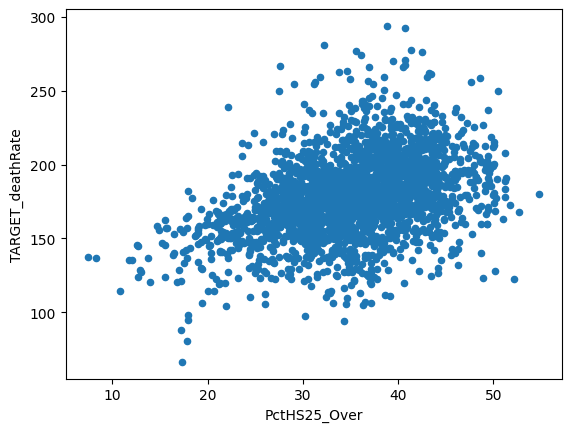

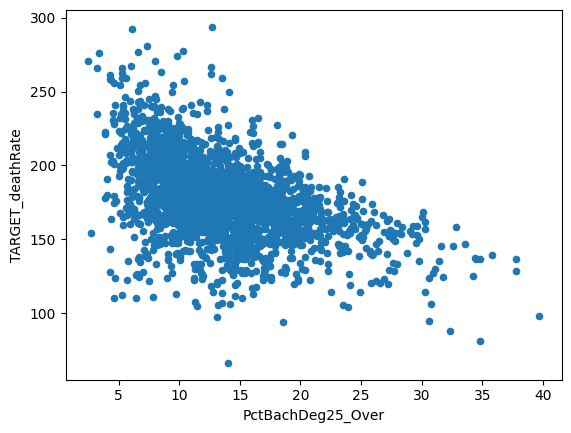

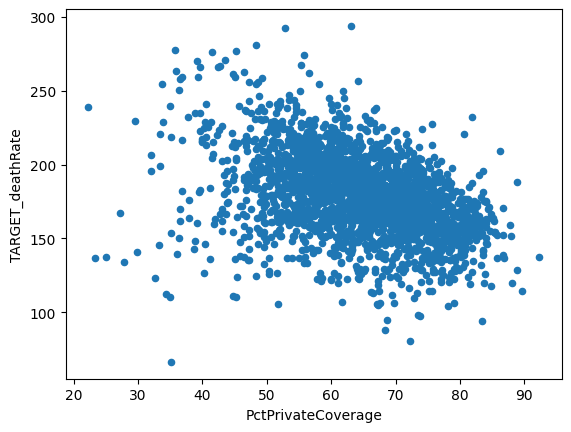

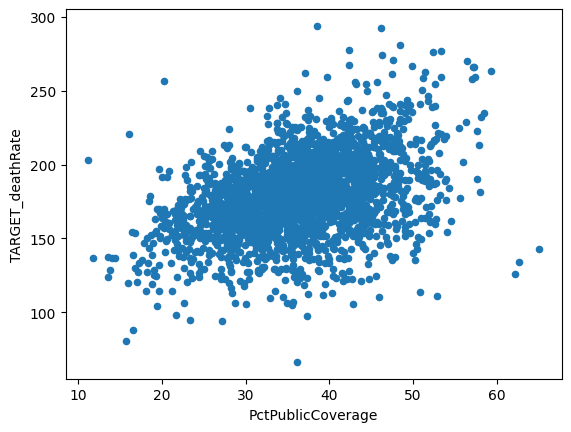

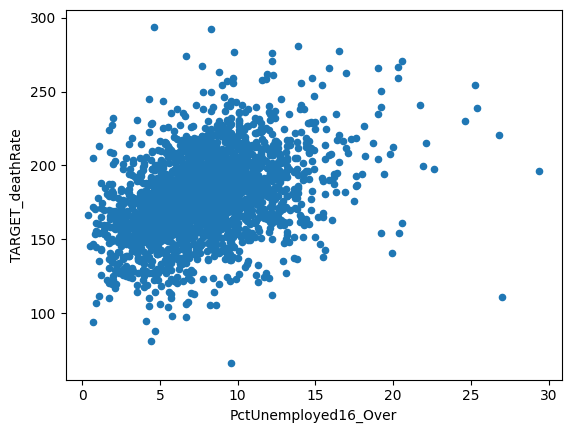

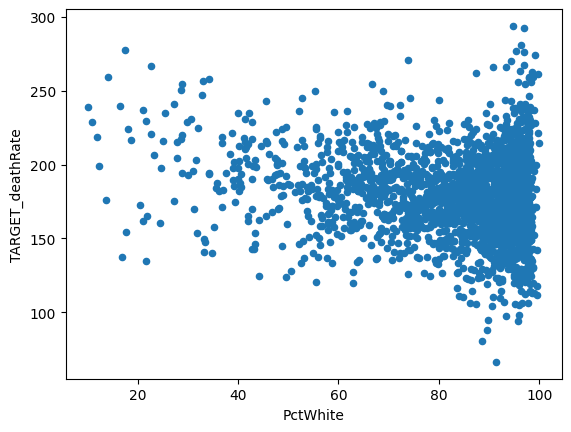

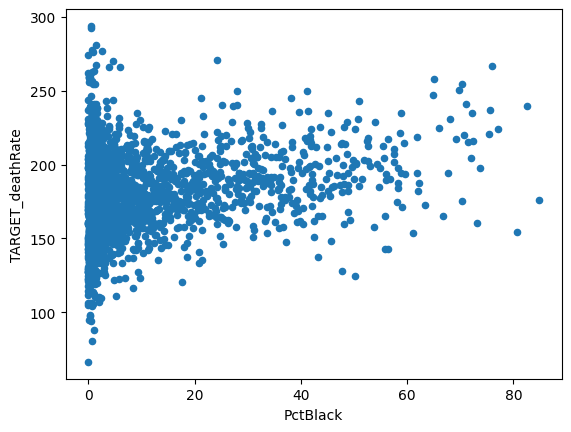

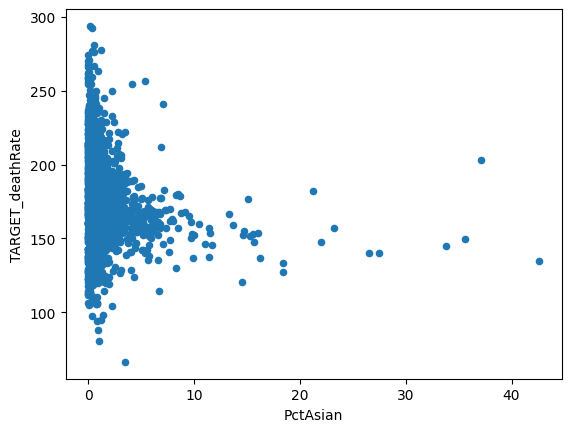

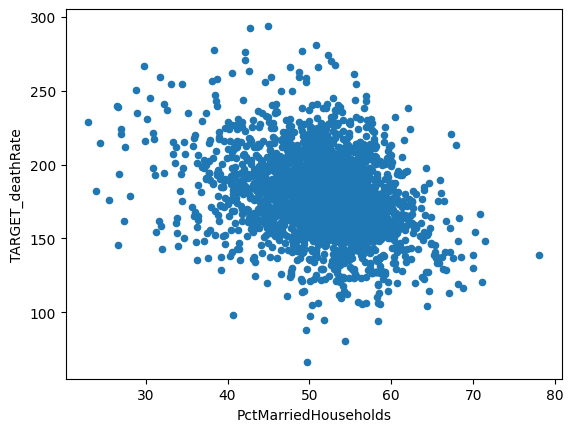

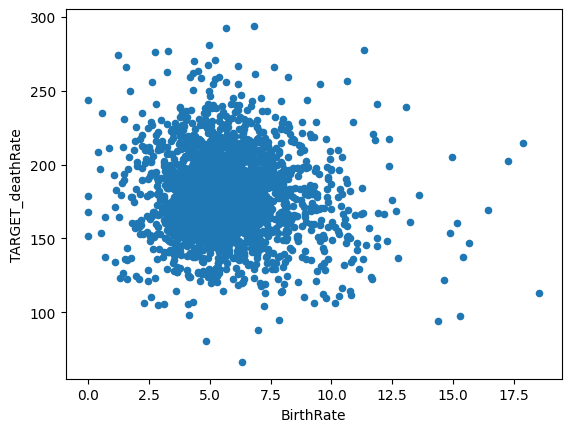

In [44]:
df_cleaned.plot(x='avgAnnCount', y= 'TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='avgDeathsPerYear', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='medIncome', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='incidenceRate', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='povertyPercent', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='popEst2015', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='studyPerCap', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='MedianAge', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='AvgHouseholdSize', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctHS18_24', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctBachDeg18_24', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctHS25_Over', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctBachDeg25_Over', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctPrivateCoverage', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctPublicCoverage', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctUnemployed16_Over', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctWhite', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctBlack', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctAsian', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='PctMarriedHouseholds', y='TARGET_deathRate', kind='scatter')
df_cleaned.plot(x='BirthRate', y='TARGET_deathRate', kind='scatter')

**[2.13]**Export cleaned training dataset to csv file stored in drive

In [45]:
df_cleaned.to_csv('/content/drive/My Drive/data/training_cleaned2.csv')

**[2.14]** Export cleaned testing dataset to csv file stored in drive

In [46]:
df_test_cleaned.to_csv('/content/drive/My Drive/data/testing_cleaned2.csv')

**[2.15]** Extract the target variable into a variable called y_train and remove it from the training dataframe

In [47]:
y_train = df_cleaned.pop('TARGET_deathRate')

**[2.16]** Extract the target variable into a variable called y_test and remove it from the testing dataframe

In [48]:
y_test = df_test_cleaned.pop('TARGET_deathRate')

**[2.17]** Save the first feature from the training dataset into a variable called X1_train


In [49]:
X1_train = df_cleaned['medIncome'].values

**[2.18]** Save the first feature from the testing dataset into a variable called X1_test


In [50]:
X1_test = df_test_cleaned['medIncome'].values

**[2.19]** Save the second feature from the training dataset into a variable called X2_train

In [51]:
X2_train = df_cleaned['povertyPercent'].values

**[2.20]** Save the second feature from the testing dataset into a variable called X2_test

In [52]:
X2_test = df_test_cleaned['povertyPercent'].values

### 3. Assess Baseline Model 

**[3.1]** Find the average of the target variable

In [53]:
y_train_mean = y_train.mean()
y_train_mean

178.84848236259228

**[3.2]** Create a numpy array called y_base filled with this value

In [54]:
y_train_base = np.full(y_train.shape, y_train_mean)
y_train_base

array([178.84848236, 178.84848236, 178.84848236, ..., 178.84848236,
       178.84848236, 178.84848236])

**[3.3]** Import the MSE and MAE from sklearn

In [55]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**[3.4]** Display the RMSE and MAE scores of this baseline model

In [56]:
print(mse(y_train, y_train_base, squared = False))
print(mae(y_train,y_train_base))

27.532803236402337
21.31608117575091


### 4. Train Initial Model with the first feature 'medIncome'

**[4.1]** Import the linear regression module from sklearn

In [57]:
from sklearn.linear_model import LinearRegression 

**[4.2]** instantiate the LinearRegression class into a variable called reg1

In [58]:
reg1 = LinearRegression()

**[4.3]** Task: Fit the model with the prepared data

In [59]:
reg1 = reg1.fit(X1_train.reshape(-1, 1),y_train)

**[4.4]** Use the trained model to predict the outcome on X_train and save them into y_preds

In [60]:
y_train_preds_1 = reg1.predict(X1_train.reshape(-1, 1))
y_train_preds_1

array([196.96069334, 196.26198941, 183.97106032, ..., 185.60271574,
       186.1832862 , 185.13623999])

**[4.5]** Display the RMSE and MAE scores on the training set

In [61]:
print(mse(y_train, y_train_preds_1, squared = False))
print(mae(y_train,y_train_preds_1))

24.764426844006742
18.86487544774789


**[4.6]** Display the RMSE and MAE scores on the testing set

In [62]:
reg1_test = LinearRegression()
reg1_test = reg1_test.fit(X1_test.reshape(-1, 1),y_test)
y_test_preds_1 = reg1_test.predict(X1_test.reshape(-1, 1))
y_test_preds_1
print(mse(y_test, y_test_preds_1, squared = False))
print(mae(y_test,y_test_preds_1))

26.22036300871205
19.119026619133443


**[4.7]** Display the predictions versus the target line charts on the training set

In [63]:
perfect_line_chart_training = alt.Chart(pd.DataFrame({'y_target': y_train, 'y_predict': y_train})).mark_line(color='green').encode(
    x='y_target',
    y='y_predict'
  )
perfect_line_chart_training
predict_line_chart_training_1 = alt.Chart(pd.DataFrame({'y_target': y_train, 'y_predict': y_train_preds_1})).mark_line().encode(
    x='y_target',
    y='y_predict'
  )
predict_line_chart_training_1
perfect_line_chart_training + predict_line_chart_training_1

alt.LayerChart(...)

**[4.8]** Display the predictions versus the target line charts on the testing set

In [64]:
perfect_line_chart_testing = alt.Chart(pd.DataFrame({'y_target': y_test, 'y_predict': y_test})).mark_line(color='green').encode(
    x='y_target',
    y='y_predict'
  )
perfect_line_chart_testing

predict_line_chart_testing_1 = alt.Chart(pd.DataFrame({'y_target': y_test, 'y_predict': y_test_preds_1})).mark_line().encode(
    x='y_target',
    y='y_predict'
  )
predict_line_chart_testing_1

perfect_line_chart_testing + predict_line_chart_testing_1

alt.LayerChart(...)

**[4.9** Display the combine scatter plot and line chart to compare predictions against actuals for training set

In [65]:
scatter_chart_training = alt.Chart(pd.DataFrame({'X1_train': X1_train, 'y_train': y_train})).mark_circle(color='orange').encode(
    x='X1_train',
    y='y_train'
  )
line_chart_training = alt.Chart(pd.DataFrame({'X1_train': X1_train, 'y_predict': y_train_preds_1})).mark_line(color='green').encode(
    x='X1_train',
    y='y_predict'
  )
scatter_chart_training + line_chart_training

alt.LayerChart(...)

**[4.10]** Display the combine scatter plot and line chart to compare predictions against actuals for testing set

In [66]:
scatter_chart_testing = alt.Chart(pd.DataFrame({'X1_test': X1_test, 'y_test': y_test})).mark_circle(color='orange').encode(
    x='X1_test',
    y='y_test'
  )
line_chart_testing = alt.Chart(pd.DataFrame({'X1_test': X1_test, 'y_predict': y_test_preds_1})).mark_line(color='green').encode(
    x='X1_test',
    y='y_predict'
  )
scatter_chart_testing + line_chart_testing

alt.LayerChart(...)

### 5. Train Second Model with second feature 'povertyPercent'


**[5.2]** Instantiate the LinearRegression class into a variable called reg2 and fit it with X2_train

In [67]:
reg2 = LinearRegression()
reg2 = reg2.fit(X2_train.reshape(-1, 1),y_train)
y_train_preds_2 = reg2.predict(X2_train.reshape(-1, 1))
y_train_preds_2


array([197.6903526 , 220.42415012, 176.28269326, ..., 187.2706954 ,
       178.55607301, 179.50331457])

**[5.3]** Print the RMSE and MAE scores for the training set

In [68]:
print(mse(y_train, y_train_preds_2, squared = False))
print(mae(y_train,y_train_preds_2))

24.731350102814876
18.857732160205813


**[5.4]** Print the RMSE and MAE scores for the testing set

In [69]:
reg2_test = LinearRegression()
reg2_test = reg2_test.fit(X2_test.reshape(-1, 1),y_test)
y_test_preds_2 = reg2_test.predict(X2_test.reshape(-1, 1))
y_test_preds_2
print(mse(y_test, y_test_preds_2, squared = False))
print(mae(y_test,y_test_preds_2))

26.29090210238529
19.499269398948915


**[5.5]** Display the predictions versus the target line charts on the training set bold text

In [70]:
perfect_line_chart_training = alt.Chart(pd.DataFrame({'y_target': y_train, 'y_predict': y_train})).mark_line(color='green').encode(
    x='y_target',
    y='y_predict'
  )
perfect_line_chart_training
predict_line_chart_training_2 = alt.Chart(pd.DataFrame({'y_target': y_train, 'y_predict': y_train_preds_2})).mark_line().encode(
    x='y_target',
    y='y_predict'
  )
predict_line_chart_training_2
perfect_line_chart_training + predict_line_chart_training_2


alt.LayerChart(...)

**[5.6]** Display the predictions versus the target line charts on the testing set

In [71]:
perfect_line_chart_testing = alt.Chart(pd.DataFrame({'y_target': y_test, 'y_predict': y_test})).mark_line(color='green').encode(
    x='y_target',
    y='y_predict'
  )
perfect_line_chart_testing
predict_line_chart_testing_2 = alt.Chart(pd.DataFrame({'y_target': y_test, 'y_predict': y_test_preds_2})).mark_line().encode(
    x='y_target',
    y='y_predict'
  )
predict_line_chart_testing_2
perfect_line_chart_testing + predict_line_chart_testing_2

alt.LayerChart(...)

**[5.7]** Display the combine scatter plot and line chart to compare predictions against actuals for testing set

In [72]:
scatter_chart_training = alt.Chart(pd.DataFrame({'X2_train': X2_train, 'y_train': y_train})).mark_circle(color='orange').encode(
    x='X2_train',
    y='y_train'
  )
line_chart_training = alt.Chart(pd.DataFrame({'X2_train': X2_train, 'y_predict': y_train_preds_2})).mark_line(color='green').encode(
    x='X2_train',
    y='y_predict'
  )
scatter_chart_training + line_chart_training

alt.LayerChart(...)

**[5.8]** Display the combine scatter plot and line chart to compare predictions against actuals for testing set

In [73]:
scatter_chart_testing = alt.Chart(pd.DataFrame({'X2_test': X2_test, 'y_test': y_test})).mark_circle(color='orange').encode(
    x='X2_test',
    y='y_test'
  )
line_chart_testing = alt.Chart(pd.DataFrame({'X2_test': X2_test, 'y_predict': y_test_preds_2})).mark_line(color='green').encode(
    x='X2_test',
    y='y_predict'
  )
scatter_chart_testing + line_chart_testing

alt.LayerChart(...)